In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data1 = pd.read_excel('XRDdata.xlsx')

In [9]:
twotheta1 = Data1.iloc[:,0].values #deg
I1 = Data1.iloc[:,1].values #units

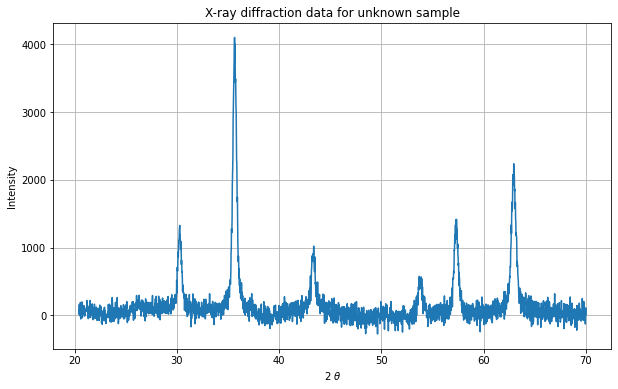

In [552]:
plt.figure(figsize=(10,6))
plt.plot(twotheta1,I1)
plt.grid()
plt.xlabel(r"2 $\theta$")
plt.ylabel("Intensity")
plt.title("X-ray diffraction data for unknown sample")
plt.savefig("unknownsamplefull.pdf")
plt.show()

In [6]:
Data2 = pd.read_excel('dataofknownsample40nm.xlsx')

In [7]:
twotheta2 = Data2.iloc[:,0].values #deg
I2 = Data2.iloc[:,1].values #units

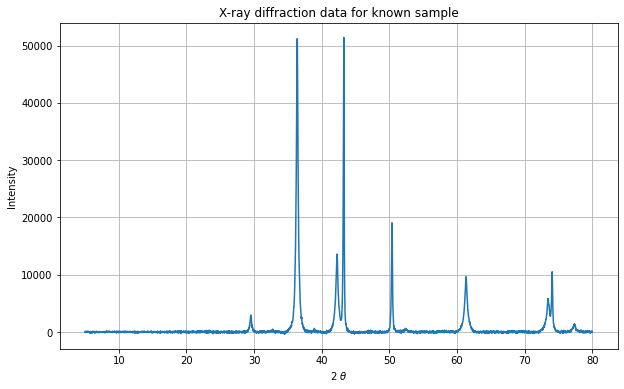

In [553]:
plt.figure(figsize=(10,6))
plt.plot(twotheta2,I2)
plt.grid()
plt.xlabel(r"2 $\theta$")
plt.ylabel("Intensity")
plt.title("X-ray diffraction data for known sample")
plt.savefig("knownsamplefull.pdf")
plt.show()

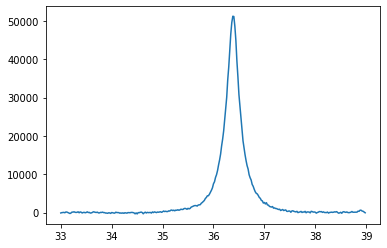

In [43]:
twothetapeak = twotheta2[1400:1700]
Intensitypeak = I2[1400:1700]

plt.plot(twothetapeak,Intensitypeak)

In [30]:
from scipy.optimize import curve_fit

In [287]:
def lorentz(x,A,mu,sigma,y0):
    
    return y0 + (A/np.pi)*(sigma/((x-mu)**2 +sigma**2))

In [298]:
def Gauss(x,A,mu,sigma,y0):
    
    return y0 + (A/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/(2 * sigma**2))

In [299]:
def lorentzfit(xdata,ydata,xrange,p0):
    
    popt, pcov = curve_fit(lorentz,xdata,ydata,p0)
    A,mu,sigma,y0 = popt
    FWHM = 2*sigma
    
    xtheta = np.linspace(xrange[0],xrange[1],500)
    Intensity = lorentz(xtheta,A,mu,sigma,y0)
    plt.plot(xtheta,Intensity,"r--",label="FWHM = %2.3f"%(FWHM))
    plt.plot(xdata,ydata)
    plt.legend()
    plt.grid()
    plt.xlabel(r'$ 2 \theta $')
    plt.ylabel('Intensity')
    
    return FWHM,mu

In [300]:
def Gaussfit(xdata,ydata,xrange,p0):
    
    popt,pcov = curve_fit(Gauss,xdata,ydata,p0)
    A,mu,sigma,y0 = popt
    FWHM = 2*sigma*np.sqrt(2*np.log(2))
    
    xtheta = np.linspace(xrange[0],xrange[1],500)
    Intensity = Gauss(xtheta,A,mu,sigma,y0)
    plt.plot(xtheta,Intensity,"k--",label="FWHM = %2.3f"%(FWHM))
    plt.plot(xdata,ydata)
    plt.legend()
    plt.grid()
    plt.xlabel(r'$ 2 \theta $')
    plt.ylabel('Intensity')
    
    return FWHM,mu
    

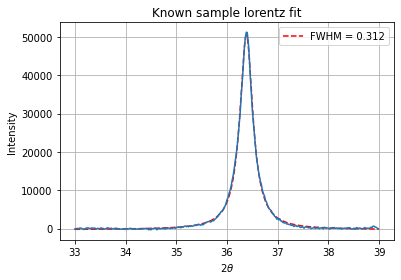

In [584]:
FHMlorentz,mulorentz = lorentzfit(twothetapeak,Intensitypeak,[33,39],[3100,36.5,0.3,0])
plt.title("Known sample lorentz fit")
plt.savefig("knownsamplelorentz.pdf")

In [480]:
D = 40 #nm
lamda = 1.540 #Angstrom

theta = mulorentz/2 * (np.pi/180)


Betacrystal = 0.9*lamda/(D*np.cos(theta)) * 10**(-1)

In [656]:
Betacrystal


0.0036472920275446557

In [494]:
Betatotal

0.005437186987319266

In [493]:
Betatotal = FHMlorentz * np.pi/180

In [486]:
Betainst1 = Betatotal - Betacrystal

In [657]:
Betainst1

0.0017898949597746107

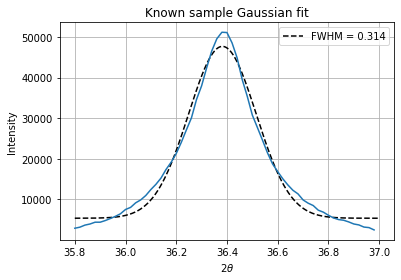

In [585]:
FHMGauss,mugauss = Gaussfit(twotheta2[1540:1600],I2[1540:1600],[35.8,37],[5000,36.5,0.3,10000])
plt.title("Known sample Gaussian fit")
plt.savefig("knownsamplegauss.pdf")

In [576]:
Betatotal = FHMGauss * np.pi/180

In [577]:
Betainst2 = np.sqrt(Betatotal**2 - Betacrystal**2)

In [578]:
Betatotal

0.005478217187273231

In [579]:
Betainst1

0.0017898949597746107

In [580]:
Betainst2

0.004087557267702194

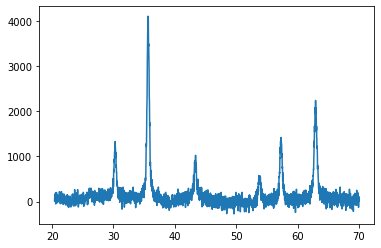

In [151]:
plt.plot(twotheta1,I1)

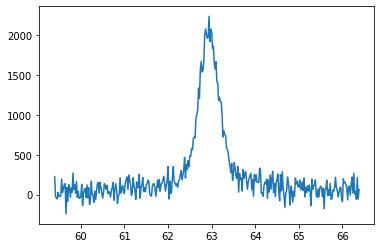

In [317]:
plt.plot(twotheta1[1950:2300],I1[1950:2300])

In [664]:
print(Betac1,Betac2,Betac3g,Betac4,Betac5,Betac6)

0.005012845152180023 0.0066355842262902365 0.006876772831723589 0.006150280504231907 0.006371288415196829 0.006853476783637513


In [595]:
Betatotal1g = FHMGauss1*np.pi/180

Betac1g = np.sqrt(Betatotal1g**2 - Betainst2**2) 
print(Betac1g)

theta1 = (mugauss1/2)*np.pi/180

D = (0.9*lamda)/(Betac1g*np.cos(theta1))
print(D)

0.0066355842262902365
216.38349022538503


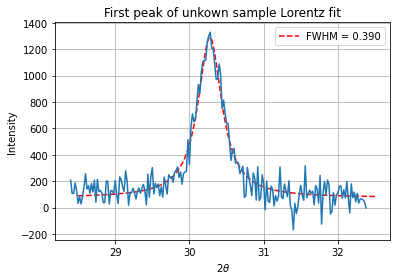

In [597]:
FHMlorentz1,mulorentz1 = lorentzfit(twotheta1[400:600],I1[400:600],[28.5,32.5],[600,30,0.4,500])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("First peak of unkown sample Lorentz fit")
plt.savefig("Firstpeakunknownlorentz.pdf")
plt.show()

In [659]:
Betatotal1 = FHMlorentz1*np.pi/180

Betac1 = Betatotal1 - Betainst1 
print(Betac1)

theta1 = (mulorentz1/2)*np.pi/180

D = (0.9*lamda)/(Betac1*np.cos(theta1))
print(D)

0.005012845152180023
286.42859181376883


In [665]:
print(Betatotal1)

0.006802740111954634


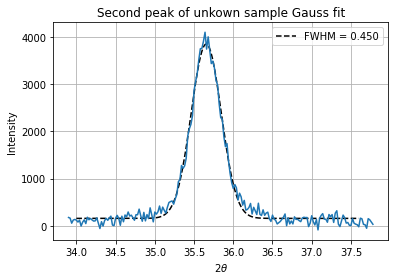

In [598]:
FHMGauss2,mugauss2 = Gaussfit(twotheta1[675:870],I1[675:870],[34,37.6],[4000,35,0.3,500])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("Second peak of unkown sample Gauss fit")
plt.savefig("Secondpeakunknowngauss.pdf")
plt.show()

In [599]:
Betatotal2g = FHMGauss2*np.pi/180

Betac2g = np.sqrt(Betatotal2g**2 - Betainst2**2) 
print(Betac2g)

theta2 = (mugauss2/2)*np.pi/180

D = (0.9*lamda)/(Betac2g*np.cos(theta2))
print(D)

0.006701323133831706
217.25712579547263


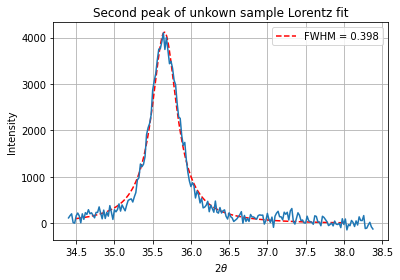

In [600]:
FHMlorentz2,mulorentz2 = lorentzfit(twotheta1[700:900],I1[700:900],[34.5,38],[4000,35,0.3,100])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("Second peak of unkown sample Lorentz fit")
plt.savefig("Secondpeakunknownlorentz.pdf")
plt.show()

In [511]:
Betatotal2 = FHMlorentz2*np.pi/180

Betac2 = Betatotal2 - Betainst1 
print(Betac2)

theta2 = (mulorentz2/2)*np.pi/180

D = (0.9*lamda)/(Betac2*np.cos(theta2))
print(D)

0.005164621551553351
281.8996744914199


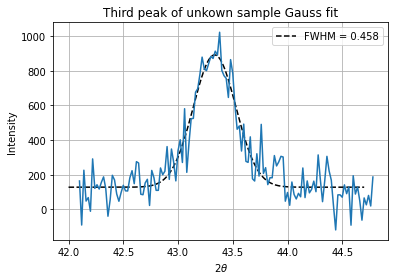

In [601]:
FHMGauss3,mugauss3 = Gaussfit(twotheta1[1085:1220],I1[1085:1220],[42,44.7],[500,43,0.3,530])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("Third peak of unkown sample Gauss fit")
plt.savefig("Thirdpeakunknowngauss.pdf")
plt.show()

In [603]:
Betatotal3g = FHMGauss3*np.pi/180

Betac3g = np.sqrt(Betatotal3g**2 - Betainst2**2) 
print(Betac3g)

theta3 = (mugauss3/2)*np.pi/180

D = (0.9*lamda)/(Betac3g*np.cos(theta3))
print(D)

0.006876772831723589
216.8711174400866


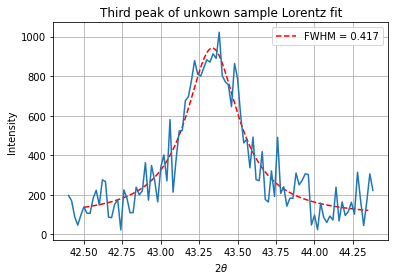

In [604]:
FHMlorentz3,mulorentz3 = lorentzfit(twotheta1[1100:1200],I1[1100:1200],[42.5,44.35],[500,43,0.3,200])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("Third peak of unkown sample Lorentz fit")
plt.savefig("Thirdpeakunknownlorentz.pdf")
plt.show()

In [512]:
Betatotal3 = FHMlorentz3*np.pi/180

Betac3 = Betatotal3 - Betainst1 
print(Betac2)

theta3 = (mulorentz3/2)*np.pi/180

D = (0.9*lamda)/(Betac3*np.cos(theta3))
print(D)

0.005164621551553351
271.90531104474746


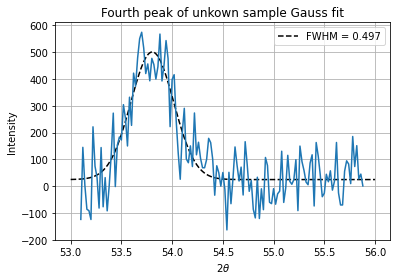

In [607]:
FHMGauss4,mugauss4 = Gaussfit(twotheta1[1635:1775],I1[1635:1775],[53,56],[500,53.5,0.3,100])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("Fourth peak of unkown sample Gauss fit")
plt.savefig("FourthpeakunknownGauss.pdf")
plt.show()

In [605]:
Betatotal4g = FHMGauss4*np.pi/180

Betac4g = np.sqrt(Betatotal4g**2 - Betainst2**2) 
print(Betac4g)

theta4 = (mugauss4/2)*np.pi/180

D = (0.9*lamda)/(Betac4g*np.cos(theta4))
print(D)

0.007655258280118808
203.02312923939257


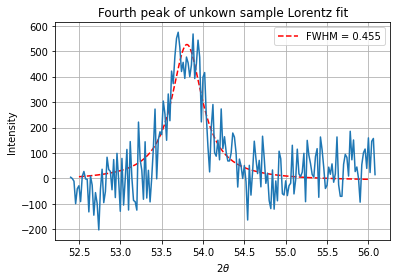

In [608]:
FHMlorentz4,mulorentz4 = lorentzfit(twotheta1[1600:1785],I1[1600:1785],[52.5,56],[500,53.5,0.3,100])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("Fourth peak of unkown sample Lorentz fit")
plt.savefig("FourthpeakunknownLorentz.pdf")
plt.show()

In [513]:
Betatotal4 = FHMlorentz4*np.pi/180

Betac4 = Betatotal4 - Betainst1 
print(Betac4)

theta4 = (mulorentz4/2)*np.pi/180

D = (0.9*lamda)/(Betac4*np.cos(theta4))
print(D)

0.006150280504231907
252.70394698216768


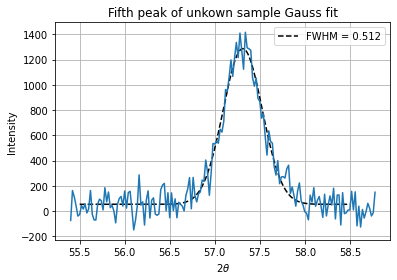

In [610]:
FHMGauss5,mugauss5 = Gaussfit(twotheta1[1750:1920],I1[1750:1920],[55.5,58.5],[500,57.5,0.3,100])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("Fifth peak of unkown sample Gauss fit")
plt.savefig("FifthpeakunknownGauss.pdf")
plt.show()

In [609]:
Betatotal5g = FHMGauss5*np.pi/180

Betac5g = np.sqrt(Betatotal5g**2 - Betainst2**2) 
print(Betac5g)

theta5 = (mugauss5/2)*np.pi/180

D = (0.9*lamda)/(Betac5g*np.cos(theta5))
print(D)

0.0079504491860634
198.66223279100336


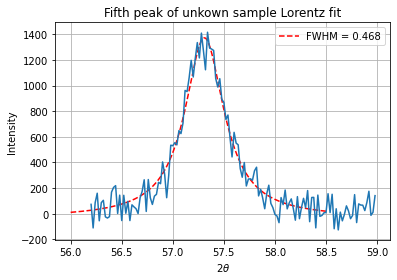

In [611]:
FHMlorentz5,mulorentz5 = lorentzfit(twotheta1[1790:1930],I1[1790:1930],[56,58.5],[500,57.5,0.3,100])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("Fifth peak of unkown sample Lorentz fit")
plt.savefig("FifthpeakunknownLorentz.pdf")
plt.show()

In [537]:
Betatotal5 = FHMlorentz5*np.pi/180

Betac5 = Betatotal5 - Betainst1 
print(Betac5)

theta5 = (mulorentz5/2)*np.pi/180

D = (0.9*lamda)/(Betac5*np.cos(theta5))
print(D)

0.006371288415196829
247.90005804314134


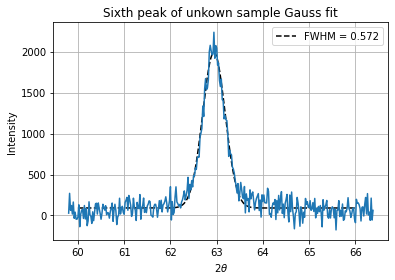

In [617]:
FHMGauss6,mugauss6 = Gaussfit(twotheta1[1970:2300],I1[1970:2300],[60,66],[500,63,0.3,100])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("Sixth peak of unkown sample Gauss fit")
plt.savefig("SixthpeakunknownGauss.pdf")
plt.show()

In [612]:
Betatotal6g = FHMGauss6*np.pi/180

Betac6g = np.sqrt(Betatotal6g**2 - Betainst2**2) 
print(Betac6g)

theta6 = (mugauss6/2)*np.pi/180

D = (0.9*lamda)/(Betac6g*np.cos(theta6))
print(D)

0.00910999408239491
178.37773358600913


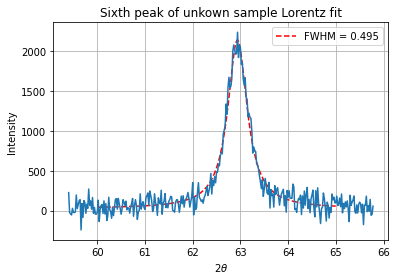

In [618]:
FHMlorentz6,mulorentz6 = lorentzfit(twotheta1[1950:2270],I1[1950:2270],[60,65],[500,63,0.3,50])
plt.xlabel(r"$2 \theta$")
plt.ylabel("Intensity")
plt.title("Sixth peak of unkown sample Lorentz fit")
plt.savefig("SixthpeakunknownLorentz.pdf")
plt.show()

In [540]:
Betatotal6 = FHMlorentz6*np.pi/180

Betac6 = Betatotal6 - Betainst1 
print(Betac6)

theta6 = (mulorentz6/2)*np.pi/180

D = (0.9*lamda)/(Betac6*np.cos(theta6))
print(D)

0.006853476783637513
237.10667128123055


In [677]:
mulorentz6

62.93850948074557

In [541]:
np.cos(twotheta/2 * (np.pi/180))

array([0.96530059, 0.9519851 , 0.92934296, 0.89177703, 0.87752425,
       0.85292042])

In [542]:
betalorentz*(np.pi/180)*np.cos(twotheta/2 * (np.pi/180))

array([0.00656669, 0.0066206 , 0.00676079, 0.00708087, 0.00738188,
       0.00737211])

In [543]:
twotheta = np.array([mulorentz1,mulorentz2,mulorentz3,mulorentz4,mulorentz5,mulorentz6])
betalorentz = np.array([FHMlorentz1,FHMlorentz2,FHMlorentz3,FHMlorentz4,FHMlorentz5,FHMlorentz6])


xaxisvalues = np.sin(twotheta/2 * (np.pi/180))
yaxisvalues = betalorentz*np.cos(twotheta/2 * (np.pi/180))*np.pi/180


In [544]:
yaxisvalues

array([0.00656669, 0.0066206 , 0.00676079, 0.00708087, 0.00716164,
       0.00737211])

In [545]:
xaxisvalues

array([0.26114127, 0.30614435, 0.36921763, 0.45247512, 0.47953149,
       0.52204096])

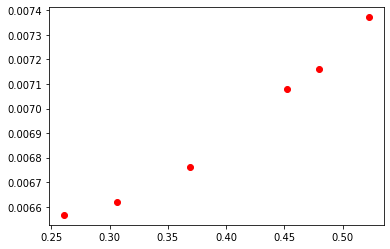

In [625]:
plt.plot(xaxisvalues,yaxisvalues,"ro")

In [624]:
def straight(x,m,c):
    return m*x+c

In [627]:
fitp,fitcov = curve_fit(straight,xaxisvalues,yaxisvalues)

In [686]:
fitcov[1,1]**0.5/intercept

0.01894979514607086

In [687]:
fitcov[0,0]**0.5/slope

0.0845728149279358

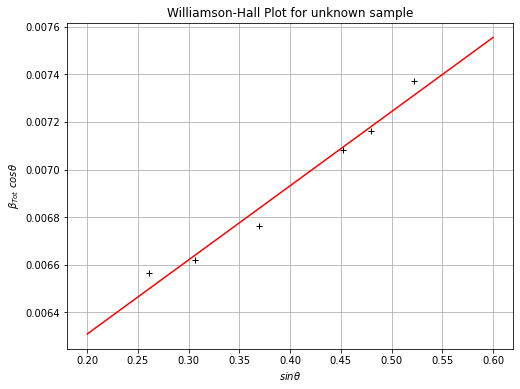

In [651]:
plt.figure(figsize=(8,6))
plt.plot(xaxisvalues,yaxisvalues,"k+",label="data points")
x = np.linspace(0.2,0.6,100)
y = straight(x,fitp[0],fitp[1])
plt.plot(x,y,"r-",label="straight line fit")
plt.grid()
plt.xlabel(r"$sin \theta$")
plt.ylabel(r"$\beta_{Tot} \ cos \theta$")
plt.title("Williamson-Hall Plot for unknown sample")
plt.savefig("Williamsonhall.pdf")

In [640]:
slope = fitp[0]
intercept = fitp[1]


print(slope,intercept)

0.0031127581699467483 0.005686913622210233


In [654]:
lamda*0.9/intercept

243.7174348115609

In [655]:
epsilon = slope/4

0.0007781895424866871

In [688]:
0.08*0.00077

6.159999999999999e-05

In [620]:
twotheta = np.array([mugauss1,mugauss2,mugauss3,mugauss4,mugauss5,mugauss6])
betagauss = np.array([FHMGauss1,FHMGauss2,FHMGauss3,FHMGauss4,FHMGauss5,FHMGauss6])


xaxisvaluesg = np.sin(twotheta/2 * (np.pi/180))
yaxisvaluesg = betagauss*np.cos(twotheta/2 * (np.pi/180))*np.pi/180